# Example 1

In [1]:
import jyrobot
import random

In [2]:
world = jyrobot.load()

Searching for jyrobot config files...
Directory: ./
    'experiment-01'
Directory: /home/dblank/jyrobot/jyrobot/worlds
    'duck-scribbler-no-walls'
    'two-scribblers-no-walls'
    'two-scribblers-one-wall'
    'two-scribblers'


In [3]:
world = jyrobot.load("two-scribblers")

Random seed initialized to: 7535594692758723058


In [4]:
world.update()
pic = world.take_picture()

In [5]:
world["red-1"]

<Robot(name='Red', position=430,50,3.14 v=0,0,0)>

In [6]:
world.watch("panel") # or "panel", "left", "right"
world.watch("inline")

Box(children=(Image(value=b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\…

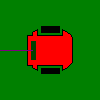

In [7]:
world.take_picture("red")

In [8]:
world.info()

This world was loaded from '/home/dblank/jyrobot/jyrobot/worlds/two-scribblers.json'
Robots:
-------------------------
  robot[0 or 'Red']: <Robot(name='Red', position=430,50,3.14 v=0,0,0)>
      device[0 or 'camera']: <Camera size=(256,128), angle=60.0>
      device[1 or 'laser']: <RangeSensor angle=0.0, range=100, width=0.0>
      device[2 or 'ir']: <RangeSensor angle=90.0, range=20, width=57.3>
      device[3 or 'ir']: <RangeSensor angle=-90.0, range=20, width=57.3>
  -------------------------
  robot[1 or 'Blue']: <Robot(name='Blue', position=30,50,0.0 v=0,0,0)>
      device[0 or 'camera']: <Camera size=(256,128), angle=60.0>
      device[1 or 'laser']: <RangeSensor angle=0.0, range=100, width=0.0>
      device[2 or 'ir']: <RangeSensor angle=0.0, range=20, width=57.3>
      device[3 or 'ir']: <RangeSensor angle=0.0, range=20, width=57.3>
  -------------------------


In [9]:
world["red"]["camera"]

<Camera size=(256,128), angle=60.0>

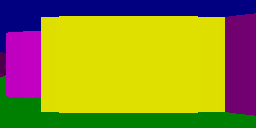

In [10]:
world["red"]["camera"].take_picture()

In [11]:
world[0].move(1, 0)
world[1].move(1, 0)

step = 0

def control(robot):
    global step
    if robot.stalled:
        robot.reverse()
        robot.turn(1 - random.random() * 2)
    if random.random() < .1:
        robot.turn(1 - random.random() * 2)
    #if step % 100 == 0:
    #    world.display(world.take_picture())
    step += 1

In [12]:
world.seconds(10, [control, control], show=True, real_time=True)

Simulation stopped at: 00:00:10.0; speed 1.0 x real time


In [13]:
world.seconds(10, [control, control], show=True, real_time=False)

Simulation stopped at: 00:00:20.0; speed 34.03 x real time


In [14]:
world.seconds(10, [control, control], show=False)

Simulation stopped at: 00:00:30.0; speed 50.25 x real time


# Example 2

In [15]:
import jyrobot
import time

In [16]:
w = jyrobot.World(width=500, height=500, ground_color="white", seed=10)
w.watch("panel", "inline")

Reusing random seed: 10


Box(children=(Image(value=b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\…

In [17]:
for i in range(20):
    robot = jyrobot.Scribbler(color="blue", name="Scribby-%s" % i)
    sensor = jyrobot.Camera()
    robot.add_device(sensor)
    w.add_robot(robot)
w.draw()

In [18]:
w.add_wall("black", 10, 0, 20, 50)

In [19]:
from jyrobot.utils import Color
import random
for robot in w:
    robot.set_color( Color(
        255 * random.random(), 
        255 * random.random(), 
        255 * random.random(), 
   ))
w.draw()   

In [20]:
%%time
pics = []
for robot in w:
    pic = robot["camera"].take_picture()
    pics.append(pic)

CPU times: user 3.17 s, sys: 0 ns, total: 3.17 s
Wall time: 3.17 s


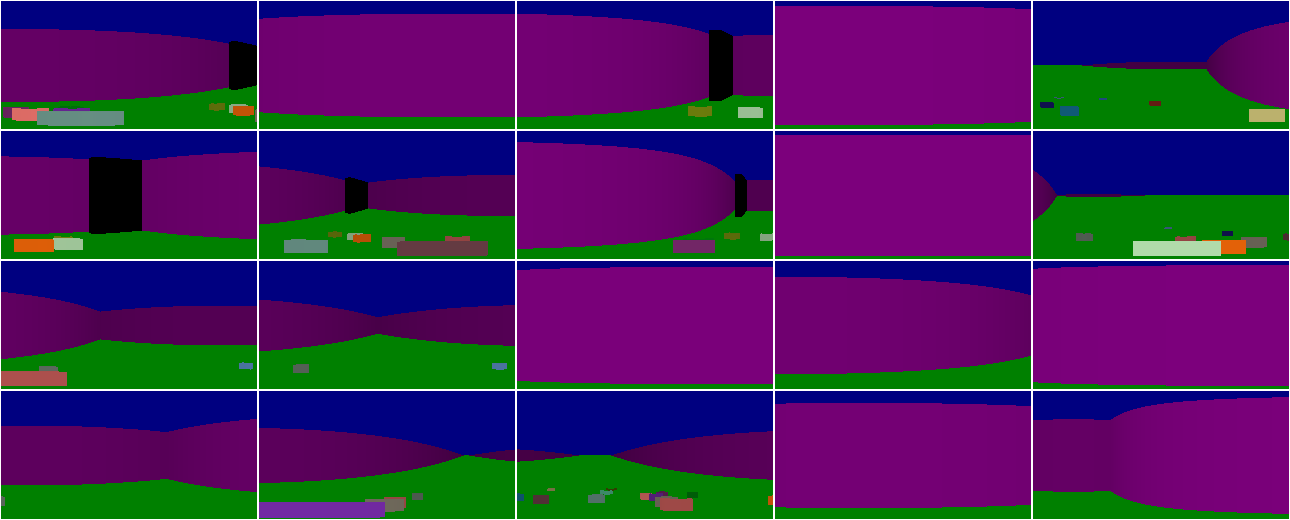

In [21]:
w.display(*pics)

In [22]:
%%time
pics = []
for i, robot in enumerate(w):
    pic = w.take_picture(i)
    pics.append(pic)

CPU times: user 1e+03 ms, sys: 0 ns, total: 1e+03 ms
Wall time: 998 ms


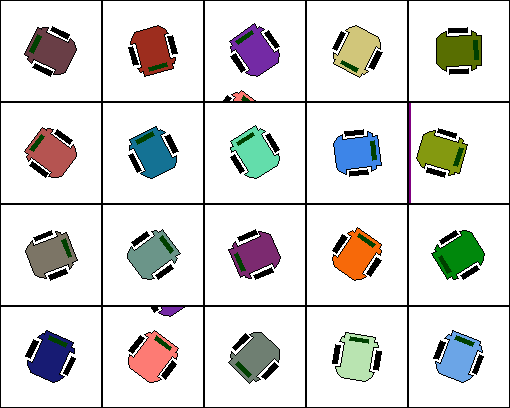

In [23]:
w.display(*pics, background_color="black")

In [24]:
for robot in w:
    robot.move(1,0)

In [25]:
def control(world):
    for robot in world:
        if robot.stalled:
            robot.reverse()
        robot.turn(1 - random.random() * 2)

In [26]:
w.run(control, show=True, real_time=False)

Simulation stopped at: 00:01:01.5; speed 4.7 x real time


# Example 3

In [27]:
import jyrobot as jr
import random

In [28]:
w = jr.World(width=100, height=100)

Random seed initialized to: 1666269509224148405


In [29]:
w.watch("inline", "panel") # or "panel", "left", "right"

Box(children=(Image(value=b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\…

In [30]:
r = jr.Scribbler()

In [31]:
w.add_robot(r)

In [32]:
sensor = jr.RangeSensor()

In [33]:
r.add_device(sensor)

In [34]:
r.forward(1)

def control(world):
    for robot in world:
        if robot.stalled:
            robot.reverse()
        robot.turn(1 - random.random() * 2)

In [35]:
w.seconds(10, control, show=True, real_time=True)

Simulation stopped at: 00:00:10.0; speed 1.0 x real time


In [36]:
w.seconds(10, control, show=True, real_time=False)

Simulation stopped at: 00:00:20.0; speed 318.22 x real time


In [37]:
w.seconds(10, control, show=False)

Simulation stopped at: 00:00:30.0; speed 408.38 x real time


In [38]:
r.set_pose(50, 50, 180)

In [39]:
r.set_color("purple")

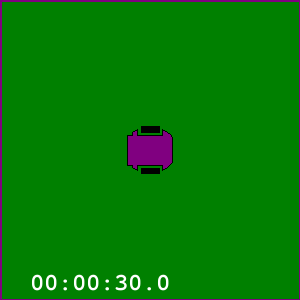

In [40]:
w.take_picture()